# Run Dreambooth fine-tuned models for Stable Diffusion using d🧨ffusers 

This notebook allows you to run Stable Diffusion concepts trained via Dreambooth using 🤗 Hugging Face [🧨 Diffusers library](https://github.com/huggingface/diffusers). 

Train your own using [here](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/sd_dreambooth_training.ipynb) and navigate the [public library concepts](https://huggingface.co/sd-dreambooth-library) to pick yours. You may also want to use the [Spaces](#) to browse the library


![Dreambooth Example](https://dreambooth.github.io/DreamBooth_files/teaser_static.jpg)
_By using just 3-5 images you can teach new concepts to Stable Diffusion and personalize the model on your own images_ 

Differently from Textual Inversion, this approach trains the whole model, which can yield better results to the cost of bigger models.



In [ ]:
#@title Install and import requirements
!pip install -qqq diffusers==0.4.1 transformers gradio ftfy 

import diffusers
import gradio
from PIL import Image
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
#@title Login to the Hugging Face Hub
#@markdown Optional step, do it if you want to run private concepts
from huggingface_hub import notebook_login
!git config --global credential.helper store

notebook_login()

In [ ]:
#@title Load the model from the [Concepts Library](https://huggingface.co/sd-dreambooth-library). If you are new to Stable Diffusion, make sure you [read the LICENSE](https://github.com/CompVis/stable-diffusion/blob/main/LICENSE)
#@markdown  You may also use a locally trained model by replacing the `model_id` to a path with the model locally or on Google Drive
from torch import autocast
from diffusers import StableDiffusionPipeline
import torch

model_id = "sd-dreambooth-library/cat-toy" #@param {type:"string"}
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

In [ ]:
#@title Run the Stable Diffusion pipeline with interactive UI Demo on Gradio
#@markdown Run this cell to get a Gradio UI like this to run your models

#@markdown ![](https://i.imgur.com/bxHfawQ.png)
import gradio as gr

def inference(prompt, num_samples):
    all_images = [] 
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)
    return all_images

with gr.Blocks() as demo:
    gr.HTML("<h2 style=\"font-size: 2em; font-weight: bold\" align=\"center\">Stable Diffusion Dreambooth - Run Concept</h2>")
    with gr.Row():
        with gr.Column():
            prompt = gr.Textbox(label="prompt")
            samples = gr.Slider(label="Samples",value=1)
            run = gr.Button(value="Run")
        with gr.Column():
            gallery = gr.Gallery(show_label=False)

    run.click(inference, inputs=[prompt,samples], outputs=gallery)
    gr.Examples([["a photo of sks toy riding a bicycle", 1,1]], [prompt,samples], gallery, inference, cache_examples=False)


demo.launch()

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

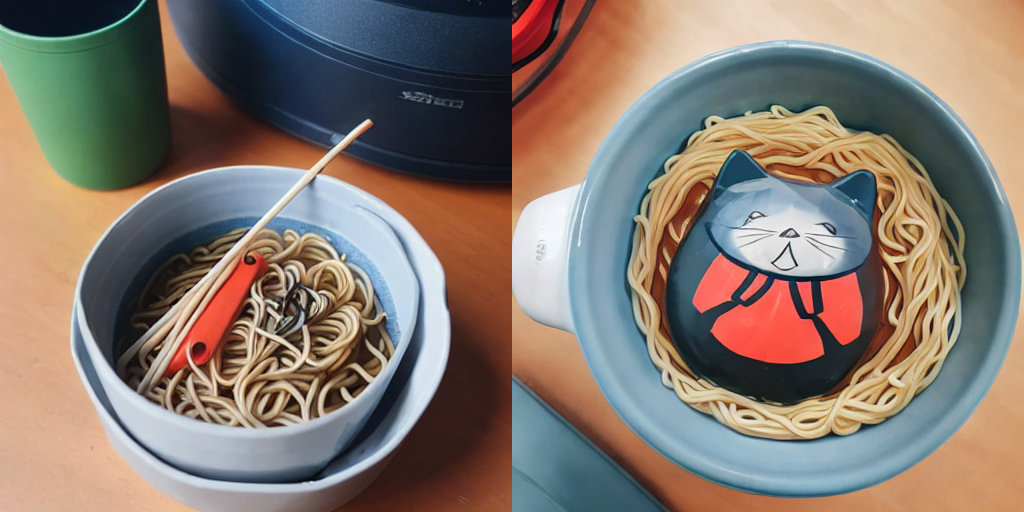

In [ ]:
#@title Run the Stable Diffusion pipeline on Colab
#@markdown Don't forget to use the `sks` token in your prompt

from torch import autocast
prompt = "a photo of sks toy floating on a ramen bowl" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}

all_images = [] 
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid